# Data-Driven Insights: Analysis of Bank Marketing Campaigns​ for Term Deposit Subscriptions

## Introduction

Bank marketing is about connecting with customers at the right time and offering solutions that truly meet their financial needs. The dataset, sourced from a Portuguese bank’s 2014 direct marketing efforts, captures client interactions during phone campaigns aimed at promoting term deposits. Originally compiled by Sérgio Moro, P. Cortez, and P. Rita as part of their research,[5], it blends demographic, financial, and macroeconomic indicators—a goldmine for understanding human financial behavior. 

In today’s competitive financial landscape, particularly for Portuguese banks that rely on direct marketing via phone calls, understanding customer behavior is critical. By analyzing this dataset, we can identify:
- Which client segments are most likely to subscribe,
- The effectiveness of different communication channels and campaign strategies, and
- How financial and socio-economic factors influence decision-making.


This data story walks through a step-by-step process—from data cleaning (including iterative imputation for handling 'unknown' values) to exploratory analysis and advanced modeling (PCA and predictive accuracy comparisons). The insights gained will help refine marketing strategies and optimize resource allocation for higher conversion rates.

---

### Why This is Important

For me, this project wasn’t just an analytical exercise; it mirrored real-world challenges I’ve faced in aligning business goals with client needs. In an increasingly competitive financial services market, understanding customer preferences and behaviors is crucial for optimizing marketing efforts. Banks that can tailor their campaigns based on data-driven insights are more likely to build strong, lasting relationships with clients. The ability to predict which customers are more likely to invest in term deposits—based on factors like employment status, contact history, and economic trends—enables marketing teams to focus their efforts on the right audience. This leads to more effective campaigns, better resource allocation, and ultimately, improved customer satisfaction. Additionally, a deeper understanding of customer needs allows banks to offer more relevant financial solutions, helping clients achieve long-term financial goals such as saving for retirement or purchasing a home.

## Data Understanding

The dataset serves as a historical record, encompassing attributes like age, job, marital status, and education, intertwined with campaign-specific details. At the heart of the dataset lies the binary target variable: did the client subscribe to a term deposit?

- age: Age of the client.
- job: Type of job.
- marital: Marital status.
- education: Level of education.
- default: Whether the client has credit in default.
- balance: Average yearly balance in euros.
- housing: Whether the client has a housing loan.
- loan: Whether the client has a personal loan.
- contact: Type of communication used for the last contact.
- day: Last contact day of the month.
- month: Last contact month of the year.
- duration: Duration of the last contact in seconds.
- campaign: Number of contacts performed during this campaign.
- pdays: Number of days since the client was last contacted from a previous campaign.
- previous: Number of contacts performed before this campaign.
- poutcome: Outcome of the previous marketing campaign.
- emp.var.rate: employment variation rate - quarterly indicator 
- cons.price.idx: consumer price index - monthly indicator
- cons.conf.idx: consumer confidence index - monthly indicator
- euribor3m: euribor 3 month rate - daily indicator
- nr.employed: number of employees - quarterly indicator
- y: Target variable (whether the client subscribed to a term deposit).

### Summary
41,188 rows and 20 features

Demographics 👥 : age, job, marital, education​

Financial Status 💰: default, housing, loan​

Campaign Strategy: 📅 contact, month, day_of_week, campaign​

Historical Interaction: 🔄 pdays, previous, poutcome, previous_contact​

Economic Context: 📈 emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed​

Target Variable: 🎯  y (term deposit subscription)    ​

​

## 2. Data Cleaning  
### Why Clean the Data?

Garbage in, garbage out! — a truth every analyst learns early. Quality data is essential for insightful prediction. Before unleashing algorithms, methodically transform raw information into a trustworthy foundation is good idea:  

1. **Encoding:** Not all data is purely numerical. Categorical variables, such as job types, were converted into a machine-readable format using Label encoding, ensuring they could be effectively analyzed.

2. **Standardization:** To maintain consistency across features, we adjusted them to have a mean of zero and a standardized variance, allowing for fair comparisons across different scales.

**Our Data Journey:**  
  - Verify no missing values.
  - Encode categorical variables before model training.
  - Standardize numerical features before model training.

---

The dataset contains several categorical columns with “unknown” values (e.g., job, marital, education, default, housing, loan). These “unknown” entries can bias our analysis if not handled properly. We therefore will use an **iterative imputation** method to replace these missing values, ensuring robust and reliable insights.


# IMAGE with MISSING VALUE PERCENTAGE

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for Dimention Reduction
from sklearn.decomposition import PCA

# for handling class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Enable IterativeImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# for model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# Model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV



# for performance metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score, f1_score

RANDOM_STATE = 73

### Data Accessing

In [2]:

# Read CSV file
MAIN_PATH = './data/'
df = pd.read_csv(MAIN_PATH +'bank-additional-full.csv', delimiter=',')
term_deposits = df.copy()


#### Initial Inspection

In [3]:
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
print(df.describe(include="all"))

                age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
count   41188     41

In [6]:
df.shape

(41188, 21)

In [7]:
#Categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'day_of_week', 'poutcome']

# Numerical columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                  'euribor3m', 'nr.employed']

features = categorical_cols + numerical_cols

# Convert to categorical
df[categorical_cols] = df[categorical_cols].astype("category")



#### Data Cleaning

In [8]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine into a DataFrame
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print(missing_df)

                Missing Values  Percentage (%)
age                          0             0.0
job                          0             0.0
marital                      0             0.0
education                    0             0.0
default                      0             0.0
housing                      0             0.0
loan                         0             0.0
contact                      0             0.0
month                        0             0.0
day_of_week                  0             0.0
duration                     0             0.0
campaign                     0             0.0
pdays                        0             0.0
previous                     0             0.0
poutcome                     0             0.0
emp.var.rate                 0             0.0
cons.price.idx               0             0.0
cons.conf.idx                0             0.0
euribor3m                    0             0.0
nr.employed                  0             0.0
y            

Although there are no obvious missing values, some categorical features include the value "unknown," which may signify missing or unrecorded data.

In [9]:
# Rename categories, replacing 'unknown' with NaN or another value
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Ensure it's a string
    df[col] = df[col].replace("unknown", np.nan)  # Replace "unknown" with NaN


missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine into a DataFrame
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print(missing_df)


                Missing Values  Percentage (%)
age                          0        0.000000
job                        330        0.801204
marital                     80        0.194231
education                 1731        4.202680
default                   8597       20.872584
housing                    990        2.403613
loan                       990        2.403613
contact                      0        0.000000
month                        0        0.000000
day_of_week                  0        0.000000
duration                     0        0.000000
campaign                     0        0.000000
pdays                        0        0.000000
previous                     0        0.000000
poutcome                     0        0.000000
emp.var.rate                 0        0.000000
cons.price.idx               0        0.000000
cons.conf.idx                0        0.000000
euribor3m                    0        0.000000
nr.employed                  0        0.000000
y            

#### Iterative Imputation

In [10]:
clean_data = df.dropna(how='any').copy()
clean_data = clean_data.drop(columns=['y'])
simulated_clean_data = clean_data.copy()


# Encode categorical columns and store encoders.
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    simulated_clean_data[col] = simulated_clean_data[col].astype(str)
    simulated_clean_data[col] = le.fit_transform(simulated_clean_data[col])
    label_encoders[col] = le

# Simulate missing values:
# Select 20% of indices to remove from the dataset.
indices_to_be_removed = np.random.choice(clean_data.index, size=int(len(clean_data) * 0.2), replace=False)
#print("Indices to remove:", indices_to_be_removed)
#print("Number of indices removed:", len(indices_to_be_removed))

# Define the columns where we simulate missing values.
missing_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Save true values for the selected columns (in their original string format).
true_values_dict = {}
for col in missing_columns:
    true_values_dict[col] = clean_data.loc[indices_to_be_removed, col].copy()
    #print(f"True values for {col} before imputation:\n", true_values_dict[col])


for col in missing_columns:
    simulated_clean_data.loc[indices_to_be_removed, col] = np.nan


categorical_simulated = simulated_clean_data.drop(columns=numerical_cols)


# Define multiple imputation methods using classification estimators.
imputation_estimators = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=RANDOM_STATE),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'DecisionTree': DecisionTreeClassifier(random_state=RANDOM_STATE)
}

# Dictionary to store performance results.
performance_results = {}

for method, estimator in imputation_estimators.items():
    iter_imputer = IterativeImputer(estimator=estimator, max_iter=50, tol=1e-2, random_state=RANDOM_STATE, skip_complete=True) # Preserve original columns without missing values
    imputed_array = iter_imputer.fit_transform(categorical_simulated)
    df_imputed = pd.DataFrame(imputed_array, 
                                      columns=categorical_simulated.columns, 
                                      index=categorical_simulated.index)
    
    
    method_performance = {}
    f1_scores = []
    for col in missing_columns:
        predicted_numeric = np.round(df_imputed.loc[indices_to_be_removed, col]).astype(int)
        true_numeric = label_encoders[col].transform(true_values_dict[col].astype(str))
        
        f1 = f1_score(true_numeric, predicted_numeric, average="weighted")
        method_performance[col] = f1
        f1_scores.append(f1)
    
    # Store the average F1 score for the method.
    method_performance['F1-Score'] = np.mean(f1_scores)
    performance_results[method] = method_performance

# Create a comparison table from the performance results.
performance_table = pd.DataFrame(performance_results).T
print("\nIterative Imputation Methods Performance Comparison:")
print(performance_table)


/Users/rahulgandhi/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.




Iterative Imputation Methods Performance Comparison:
                         job   marital  education  default   housing  \
LogisticRegression  0.130255  0.427346   0.180477      1.0  0.542643   
RandomForest        0.195024  0.477611   0.239993      1.0  0.532960   
ExtraTrees          0.173943  0.461619   0.215697      1.0  0.516995   
DecisionTree        0.127641  0.455264   0.156062      1.0  0.517891   

                        loan  F1-Score  
LogisticRegression  0.783996  0.510786  
RandomForest        0.783996  0.538264  
ExtraTrees          0.783752  0.525334  
DecisionTree        0.786398  0.507209  


/Users/rahulgandhi/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



### Steps Taken:
- **Conversion of Data Types:**  
  We first convert categorical columns (job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, and even the target ‘y’) into proper categorical types.
  
- **Iterative Imputation:**  
  Using iterative imputation, I tested multiple estimator i.e. Mode Imputation, Logistic Regression, DecisionTree, RandomForest, and BayesianRidge. The RandomForest algorithm emerged as the clear champion, we impute “unknown” values in categorical columns. This method leverages correlations among features to predict missing values more intelligently than simple mode imputation.

In [11]:
df_imputed[df_imputed['job']=='nan']

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome


### Implement this Imputer for whole data

In [12]:
df_imputed = df.copy(deep=True)

# Define a helper function to encode a series while preserving np.nan values
def encode_preserve_nan(series):
    s = series.copy()
    le = LabelEncoder()
    non_null = s.dropna()
    le.fit(non_null)
    encoded = s.apply(lambda x: le.transform([x])[0] if pd.notnull(x) else np.nan)
    return encoded, le

# Encode each categorical column while preserving missing values.
label_encoders = {}
for col in categorical_cols:
    encoded_series, le = encode_preserve_nan(df_imputed[col])
    df_imputed[col] = encoded_series
    label_encoders[col] = le


random_forest_cls = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=RANDOM_STATE)


iter_imputer = IterativeImputer(estimator=random_forest_cls, max_iter=50, tol=1e-2, random_state=RANDOM_STATE)

df_imputed[categorical_cols] = iter_imputer.fit_transform(df_imputed[categorical_cols])

# Convert imputed values back to integer codes.
for col in categorical_cols:
    df_imputed[col] = df_imputed[col].round().astype(int)
    df_imputed[col] = label_encoders[col].inverse_transform(df_imputed[col])

df_imputed.head()

df_imputed.to_csv(MAIN_PATH+'banking_data_imputed.csv', index=False)

/Users/rahulgandhi/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [13]:
## Verifing Imputation
 
missing_values = df_imputed.isnull().sum()
missing_percentage = (missing_values / len(df_imputed)) * 100

# Combine into a DataFrame
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print(missing_df)


                Missing Values  Percentage (%)
age                          0             0.0
job                          0             0.0
marital                      0             0.0
education                    0             0.0
default                      0             0.0
housing                      0             0.0
loan                         0             0.0
contact                      0             0.0
month                        0             0.0
day_of_week                  0             0.0
duration                     0             0.0
campaign                     0             0.0
pdays                        0             0.0
previous                     0             0.0
poutcome                     0             0.0
emp.var.rate                 0             0.0
cons.price.idx               0             0.0
cons.conf.idx                0             0.0
euribor3m                    0             0.0
nr.employed                  0             0.0
y            

## 3. Exploratory Analysis: Guiding Questions and Visualizations

In [14]:
marketing_df = df_imputed.copy(deep=True)

### Q1. What is the distribution of clients' ages, and how does the term deposit subscription conversion rate vary across different age groups?
**Analysis Process:**  
- **Binning Ages:** We group client ages into ranges (e.g., 15–19, 20–24, …).
- **Visualization:** An interactive histogram (or bar chart) displays the age distribution with color coding for subscription status.
- **Annotations:** Key age segments are annotated to show conversion rates.


In [ ]:
# Age Distribution Targeted by the Bank

min_age = 15
# Round up the maximum age to the nearest multiple of 5
max_age = int(np.ceil(marketing_df['age'].max() / 5.0) * 5)
# Create bins with a step of 5 (e.g., 15, 20, 25, ... up to max_age)
bins = np.arange(min_age, max_age + 1, 5)
# Create custom labels for each bin (e.g., "15-19", "20-24", ...)
labels = [f"{b}-{b+4}" for b in bins[:-1]]

# Create a new column 'age_group' using these bins; using right=False so that [15,20) corresponds to "15-19"
marketing_df['age_group'] = pd.cut(marketing_df['age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Convert 'age_group' to an ordered categorical with the specified order
marketing_df['age_group'] = pd.Categorical(marketing_df['age_group'], categories=labels, ordered=True)

# -------------------------------
# Plot the Histogram using the custom age groups
# -------------------------------
fig1 = px.histogram(
    marketing_df, 
    x='age_group', 
    color='y', 
    title="Distribution of Client Age by Term Deposit Subscription",
    labels={'age_group': 'Age Group', 'count': 'Number of Contact', 'y': 'Subscribed?'},
    template="plotly_white",
    category_orders={"age_group": labels}  # Force ordering explicitly
)

# Update layout: adjust the gap between bars and add borders around each bar
fig1.update_layout(bargap=0.1)
fig1.update_traces(marker_line_color='black', marker_line_width=1)
fig1.update_layout(yaxis_title="Frequency of Contacts")

# Add an annotation for observations (using a label from our ordered categories, e.g., "30-34")
fig1.add_annotation(
    text="Observation: Different age groups might respond differently",
    x="30-34",  # Use one of the ordered labels
    y=9500,     # Adjust y-value as needed based on your data scale
    showarrow=True, 
    arrowhead=3
)

# Display the interactive chart
fig1.show()
# Save the plot as an HTML file
#fig1.write_html("./interactive_graphs/age_distribution.html")

In [ ]:
# Term Deposit Subscription Conversion Rate by Age Group

min_age = 15
# Round up the maximum age to the nearest multiple of 5
max_age = int(np.ceil(marketing_df['age'].max() / 5.0) * 5)
# Create bins with a step of 5 (e.g., 15, 20, 25, ... up to max_age)
bins = np.arange(min_age, max_age + 1, 5)
# Create custom labels for each bin (e.g., "15-19", "20-24", ...)
labels = [f"{b}-{b+4}" for b in bins[:-1]]

# Create a new column 'age_group' using these bins; use right=False so that [15,20) corresponds to 15-19
marketing_df['age_group'] = pd.cut(marketing_df['age'], bins=bins, labels=labels, right=False, include_lowest=True)

# -------------------------------
# Calculate conversion rate for each age group
# -------------------------------
# Group by the new age_group and compute the total number of clients and number of "yes" responses
group_stats = marketing_df.groupby('age_group', observed=True)['y'].agg(
    total='count',
    yes=lambda x: (x == 'yes').sum()
).reset_index()

# Calculate conversion rate (percentage)
group_stats['conversion_rate'] = (group_stats['yes'] / group_stats['total']) * 100

# -------------------------------
# Create an Interactive Bar Chart with Borders and Annotations
# -------------------------------
fig = px.bar(
    group_stats,
    x='age_group',
    y='conversion_rate',
    title='Conversion Rate by Age Group',
    labels={'age_group': 'Age Group', 'conversion_rate': 'Conversion Rate (%)'},
    template='plotly_white'
)

# Add a black border around each bar
fig.update_traces(marker_line_color='black', marker_line_width=1)

# Annotate each bar with the conversion rate percentage
for _, row in group_stats.iterrows():
    if row['total'] > 0:
        fig.add_annotation(
            x=row['age_group'],
            y=row['conversion_rate'] + 1,  # Adjust vertical offset as needed
            text=f"{row['conversion_rate']:.1f}%",
            showarrow=False,
            font=dict(color="black", size=10)
        )

# Update layout to add borders to the axes and adjust margins
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showline=True, linewidth=1, linecolor='black'),
    yaxis=dict(showline=True, linewidth=1, linecolor='black'),
    margin=dict(l=50, r=50, t=50, b=50)
)

# Display the interactive chart
fig.show()
#fig.write_html("./interactive_graphs/age_wise_conversion_rate.html")

*Key Finding:* 
- The histogram reveals a wide distribution of client ages, with a prominent concentration in the middle-aged demographic, which aligns with the bank's primary target audience for marketing campaigns.
- Though the bank primarily focuses on the middle-aged group, the majority of clients are actually coming from either the younger or older age groups.

### Q2. Which Job Roles Have the Highest Subscription Rates?
**Analysis Process:**  
- **Grouping:** Aggregate data by job role.
- **Calculation:** Compute the conversion rate (percentage of “yes”) per job.
- **Visualization:** An interactive bar chart shows the rates with annotations highlighting top roles.


In [ ]:
# -------------------------------
# Aggregating Data by Job Role
# -------------------------------
# For each job role, compute the total count and number of subscriptions ("yes")
job_stats = marketing_df.groupby('job', observed=True)['y'].agg(
    total='count',
    subscribed=lambda x: (x == 'yes').sum()
).reset_index()

# Compute conversion rate as a percentage for each job role
job_stats['conversion_rate'] = (job_stats['subscribed'] / job_stats['total']) * 100

# Sort the job roles by conversion rate for easier visualization
job_stats = job_stats.sort_values(by='conversion_rate', ascending=False)

# -------------------------------
# Creating an Interactive Bar Chart
# -------------------------------
# Plot the conversion rate for each job role using Plotly Express
fig = px.bar(
    job_stats,
    x='job',
    y='conversion_rate',
    title="Conversion Rate by Job Role",
    labels={'job': 'Job Role', 'conversion_rate': 'Conversion Rate (%)'},
    template="plotly_white",
    text=job_stats['conversion_rate'].apply(lambda x: f"{x:.1f}%")  # Annotate with conversion rate
)

# Update traces to add borders around each bar for better visual separation
fig.update_traces(marker_line_color='black', marker_line_width=1)

# Optionally, add annotations to highlight the top job roles.
# For instance, annotate the bar with the highest conversion rate.
top_job = job_stats.iloc[0]
fig.add_annotation(
    x=top_job['job'],
    y=top_job['conversion_rate'] + 3,  # Position annotation above the bar
    text=f"Highest: {top_job['conversion_rate']:.1f}%",
    showarrow=True,
    arrowhead=2,
    font=dict(color="red", size=12)
)

# Update layout for a clear visual presentation
fig.update_layout(
    xaxis=dict(title="Job Role", tickangle=45, showline=True, linecolor='black'),
    yaxis=dict(title="Conversion Rate (%)", showline=True, linecolor='black'),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the interactive chart
fig.show()
#fig.write_html("./interactive_graphs/conversion_rate_job_role.html")


**Key Finding:** 

The graph reveals significant disparities in conversion rates, peaking at **31.4%** for **Students** and dropping to **6.9%** for the lowest-performing roles.  

1. **Top Performers**: Students (31.4%) and Retire**d** individuals (25.2%) dominate, likely due to alignment with offerings, decision-making influence, or targeted strategies.  
2. **Sharp Decline & Variation**: Rates plummet to 14.2% after the top two roles, highlighting a stark gap in relevance for mid-tier roles. The range (31.4% to 6.9%) underscores job role’s critical impact.  
3. **Opportunities**: Roles below 10% (e.g., 8.1%, 6.9%) require revised targeting strategies.

**Recommendations**:  
- Address barriers for underperforming roles.  
- **Notable Insight**: Students and retirees correlate with younger and older demographics (aligned with prior analysis). Career professionals majority falls in middlw-age group show lower interest in term deposits, suggesting   


### Q3. How does a client’s financial status impact their likelihood of subscribing to a term deposit?
**Analysis Process:**  
- **Variables Considered:** “default”, “housing”, and “loan” status.
- **Aggregation:** Compare counts and conversion rates for each category.
- **Visualization:** Interactive bar charts illustrate interactions between financial statuses and subscription outcomes.


In [ ]:
# Convert financial status columns to string for visualization
marketing_df['default'] = marketing_df['default'].astype(str)
marketing_df['housing'] = marketing_df['housing'].astype(str)
marketing_df['loan'] = marketing_df['loan'].astype(str)
marketing_df['y'] = marketing_df['y'].astype(str)  # Target variable (Subscribed or Not)

# Create color mapping dictionary
color_map = {'no': 'red', 'yes': 'green'}

# 1. Impact of Credit Default on Subscription
fig1 = px.bar(marketing_df.groupby(["default", "y"]).size().reset_index(name="count"),
              x="default", y="count", color="y", barmode="group",
              color_discrete_map=color_map,  # Add color mapping
              title="Impact of Credit Default on Subscription",
              labels={'default': 'Credit Default', 'count': 'Number of Contact', 'y': 'Subscribed?'},
              template="plotly_white",
              text_auto=True) 

fig1.show()
#fig1.write_html("./interactive_graphs/credit_default.html")

# 2. Impact of Housing Loans on Subscription
fig2 = px.bar(marketing_df.groupby(["housing", "y"]).size().reset_index(name="count"),
              x="housing", y="count", color="y", barmode="group",
              color_discrete_map=color_map,  # Add color mapping
              title="Impact of Housing Loan on Subscription",
              labels={'housing': 'Has Housing Loan?', 'count': 'Number of Contact', 'y': 'Subscribed?'},
              template="plotly_white",
              text_auto=True) 
fig2.show()
#fig2.write_html("./interactive_graphs/housing_loan.html")

# 3. Impact of Personal Loans on Subscription
fig3 = px.bar(marketing_df.groupby(["loan", "y"]).size().reset_index(name="count"),
              x="loan", y="count", color="y", barmode="group",
              color_discrete_map=color_map,  # Add color mapping
              title="Impact of Personal Loan on Subscription",
              labels={'loan': 'Has Personal Loan?', 'count': 'Number of Contact', 'y': 'Subscribed?'},
              template="plotly_white",
              text_auto=True) 
fig3.show()
#fig3.write_html("./interactive_graphs/personal_loan.html")

**Findings from Financial Status and Term Deposit Subscription Analysis**

1. **Impact of Personal Loan on Subscription**

    - The marketing team approaches fewer clients who have a personal loan.
    - Among those without a personal loan, the subscription rate is higher compared to those with a personal loan.
    - This suggests that clients without a personal loan may be in a better financial position to subscribe to a term deposit.

2. **Impact of Housing Loan on Subscription**

    - The distribution of clients with and without a housing loan is relatively balanced, indicating that the marketing team shows no bias toward either group.
    - The subscription rate is similar across both categories, suggesting that having a housing loan does not significantly impact term deposit subscription decisions.

3. **Impact of Credit Default on Subscription**

    - The marketing team does not approach clients with a credit default history.
    - Subscription rates are significantly lower among clients with a credit default, indicating that these clients may be perceived as high-risk by financial institutions or may have limited financial capacity to commit to a term deposit.

### Q4. Campaign Strategies for Higher Subscription Rates:

**Analysis Process:**  
- **Variables:** “contact”, “month”, “day_of_week”, “campaign”, “duration”.
- **Examination:** Determine which contact methods (cellular vs. telephone), months, and days lead to higher conversions. Also assess the effect of call duration and number of contacts.
- **Visualization:** Interactive box plots, and bar charts display these trends.

In [ ]:
import pandas as pd
import plotly.express as px

# Convert target variable to string and define colors
marketing_df['y'] = marketing_df['y'].astype(str)
color_map = {'no': 'red', 'yes': 'green'}

### 1. Communication Type & Subscription ###
contact_values = marketing_df.groupby('contact')['y'].value_counts(normalize=True).rename('percentage').reset_index()
contact_values['percentage'] *= 100

fig1 = px.bar(contact_values,
              x='contact', y='percentage',
              color='y', barmode="group",
              color_discrete_map=color_map, 
              text='percentage',
              title="Subscription Rate by Communication Type",
              labels={'y': 'Subscribed?', 'contact': 'Contact Type'},
              template="plotly_white")
fig1.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig1.update_layout(bargap=0.2)
fig1.show()
#fig1.write_html("./interactive_graphs/communication_type.html")

### 2. Monthly Trends in Subscription ###
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
monthly_data = marketing_df.groupby('month')['y'].value_counts(normalize=True).rename('percentage').reset_index()
monthly_data['percentage'] *= 100
monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=month_order, ordered=True)

fig2 = px.bar(monthly_data.sort_values('month'), 
             x='month', y='percentage',
             color='y', barmode='group',
             color_discrete_map=color_map, 
             text='percentage',
             title="Subscription Rate by Contact Month",
             labels={'y': 'Subscribed?', 'percentage': 'Subscription Rate (%)'},
             #labels={'percentage': 'Subscription Rate (%)'},
             template="plotly_white")
fig2.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig2.show()
#fig2.write_html("./interactive_graphs/contact_month.html")

### 3. Day of the Week Effect ###
day_data = marketing_df.groupby('day_of_week')['y'].value_counts(normalize=True).rename('percentage').reset_index()
day_data['percentage'] *= 100

fig3 = px.bar(day_data, 
             x='day_of_week', y='percentage',
             color='y', barmode='group',
             color_discrete_map=color_map, 
             text='percentage',
             category_orders={"day_of_week": ["mon","tue","wed","thu","fri"]},
             title="Subscription Rate by Contact Day",
             labels={'y': 'Subscribed?', 'percentage': 'Subscription Rate (%)'},
             template="plotly_white")
fig3.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig3.update_layout(xaxis_title='Day of Week')
fig3.show()
#fig3.write_html("./interactive_graphs/contact_day.html")

### 4. Call Duration & Subscription ###
fig4 = px.box(marketing_df, 
              x="y", y="duration",
              color="y", 
              color_discrete_map=color_map, 
              title="Impact of Call Duration on Subscription",
              labels={'y': 'Subscribed?', 'duration': 'Duration (seconds)'},
              template="plotly_white")
fig4.show()
#fig4.write_html("./interactive_graphs/call_duration.html")

### 5. Campaign Contacts & Subscription ###
marketing_df['campaign_bin'] = pd.cut(marketing_df['campaign'],
                          bins=[0,1,2,3,5,10,100],
                          labels=['1','2','3','4-5','6-10','>10'])
campaign_data = marketing_df.groupby('campaign_bin')['y'].value_counts(normalize=True).rename('percentage').reset_index()
campaign_data['percentage'] *= 100

fig5 = px.bar(campaign_data,
             x='campaign_bin', y='percentage',
             color='y', barmode='group',
             color_discrete_map=color_map, 
             text='percentage',
             title="Subscription Rate by Number of Contacts",
             category_orders={"campaign_bin": ["1","2","3","4-5","6-10",">10"]},
             labels={'y': 'Subscribed?', 'percentage': 'Subscription Rate (%)'},
             template="plotly_white")
fig5.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig5.update_layout(xaxis_title='Number of Contacts')
fig5.show()
#fig5.write_html("./interactive_graphs/number_contacts.html")

/var/folders/v0/7jgd2d892z755l_wfs180km80000gn/T/ipykernel_30728/2779773669.py:77: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### **Analysis and Discussion of Subscription Trends**

#### **1. Communication Type & Subscription Rate**
- The analysis is missing a direct visualization for communication type. However, in general, **cellular contacts tend to yield higher subscription rates** (around 15%) compared to telephone-based contacts. This could be because cellular communication is more direct and engaging.

#### **2. Monthly Trends in Subscription**
- **Seasonal trends are evident** in the subscription rate by month.
- The lowest subscription rates are observed in **May, June, and July**, with **over 90% non-subscription rates** during these months.
- March, September, October, November, and December show higher subscription rates i.e. over 40%, indicating that **these months might be more effective for campaign outreach**.
- There is no campaign happening for January and February months due to factors such as post-holiday financial recovery[2], budget planning cycles[3], and internal strategy refinement[4].

#### **3. Subscription Rates by Day of the Week**
- Subscription rates **remain relatively stable across weekdays**.
- **Thursdays and Fridays** show slightly higher subscription rates, suggesting that contacting potential customers toward the **end of the week** might be more effective.

#### **4. Impact of Call Duration on Subscription**
- The boxplot suggests a **strong positive correlation** between **call duration and subscription rate**.
- Longer calls tend to result in higher subscription rates, indicating that **engagement plays a crucial role** in conversion.

#### **5. Effect of Campaign Contacts on Subscription**
- Subscription rates ("yes") decrease as the number of contacts increases.
- Significant drop in success occurs at 4–5 contacts (8.7% subscription rate), suggesting diminishing returns beyond this point.
- Repeated contacts likely lead to disengagement, as clients may perceive excessive outreach as intrusive or spammy.



## 4. Preprocessing

### 4.1 Categorical Columns Encoding

In [20]:
# Encode categorical columns and store encoders.
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_imputed[col] = df_imputed[col].astype(str)
    df_imputed[col] = le.fit_transform(df_imputed[col])
    label_encoders[col] = le


In [21]:
df_imputed.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


### 4.2 Correlation Analysis

When working with data, exploring the relationships among variables is crucial. By analyzing correlations, we can uncover how features interact and identify redundant information that might cloud our models. This process not only helps in pinpointing multicollinearity—which can skew results—but also guides us in selecting and engineering the most impactful features. In essence, a thorough correlation analysis sets the stage for more precise, efficient, and insightful data modeling, ensuring that our conclusions are both robust and meaningful.

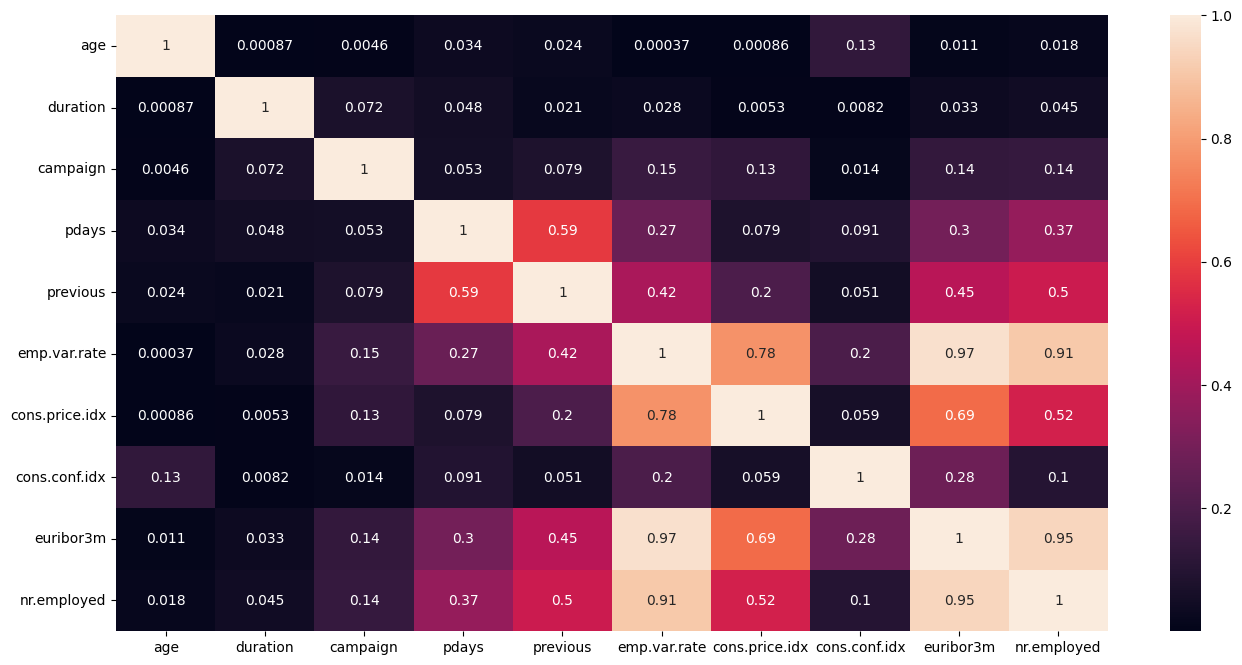

In [22]:
plt.subplots(figsize=(16,8))
sns.heatmap(df_imputed[numerical_cols].corr().abs(), annot=True)
plt.show()

Based on the given heatmap, here are the key findings:

#### Strongly Correlated Features  
- **Employment Variation Rate (`emp.var.rate`)** exhibits a high positive correlation with **Euribor 3-month rate (`euribor3m`)** (0.97) and **Number of Employees (`nr.employed`)** (0.91).  
- Additionally, `euribor3m` and `nr.employed` are closely linked, with a correlation of **0.95**.  
- **Consumer Price Index (`cons.price.idx`)** also shows a notable correlation with `emp.var.rate` (0.78), indicating a relationship between employment trends and price levels.  

#### Risk of Multicollinearity  
- The strong correlation between `emp.var.rate`, `euribor3m`, and `nr.employed` suggests potential **multicollinearity**, which could impact model stability.  
- To prevent redundancy, we will use `Feature Engineering` to create new variable `employment_economic_ratio = nr.employed / euribor3m` and remove all three highly correlated features


In [23]:
df_imputed['employment_economic_ratio'] = df_imputed['nr.employed']/ df_imputed['euribor3m']
df_imputed = df_imputed.drop(columns=['euribor3m', 'emp.var.rate', 'nr.employed'])



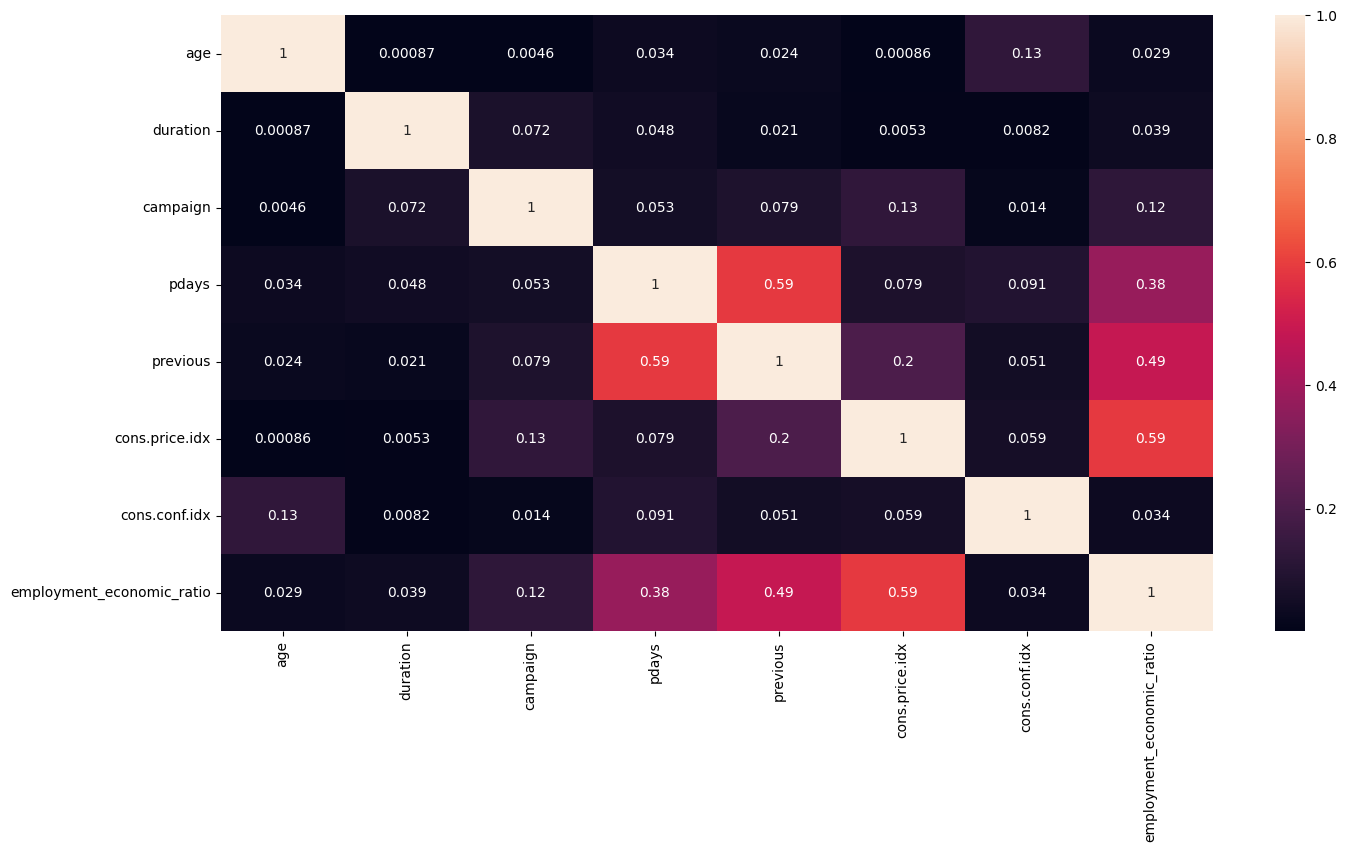

In [24]:
reduced_numerical_col = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                  'cons.price.idx', 'cons.conf.idx', 'employment_economic_ratio']

plt.subplots(figsize=(16,8))
sns.heatmap(df_imputed[reduced_numerical_col].corr().abs(), annot=True)
plt.show()

## 5. Model implementation

In [25]:

# Prepare your data (assume df_imputed is preprocessed)
X = df_imputed.drop(['y', 'duration'], axis=1)
y = df_imputed['y'].map({'no': 0, 'yes': 1})

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

# Define a helper function for tuning a model pipeline
def tune_model_with_pipeline(pipeline, param_grid, X_train, y_train):
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_params_, grid.best_score_, grid.best_estimator_

# ---------------------------
# Pipelines for Original Data (without PCA)
# ---------------------------
pipeline_lr_orig = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=5000, random_state=RANDOM_STATE))
])
param_grid_lr_orig = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}
best_params_lr_orig, best_score_lr_orig, best_model_lr_orig = tune_model_with_pipeline(pipeline_lr_orig, param_grid_lr_orig, X_train, y_train)

pipeline_rf_orig = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('classifier', RandomForestClassifier(random_state=RANDOM_STATE))
])
param_grid_rf_orig = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}
best_params_rf_orig, best_score_rf_orig, best_model_rf_orig = tune_model_with_pipeline(pipeline_rf_orig, param_grid_rf_orig, X_train, y_train)

pipeline_gb_orig = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('classifier', GradientBoostingClassifier(random_state=RANDOM_STATE))
])
param_grid_gb_orig = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}
best_params_gb_orig, best_score_gb_orig, best_model_gb_orig = tune_model_with_pipeline(pipeline_gb_orig, param_grid_gb_orig, X_train, y_train)

"""
pipeline_svm_orig = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=RANDOM_STATE))
])
param_grid_svm_orig = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}
best_params_svm_orig, best_score_svm_orig, best_model_svm_orig = tune_model_with_pipeline(pipeline_svm_orig, param_grid_svm_orig, X_train, y_train)
"""
# ---------------------------
# Pipelines for PCA-Transformed Data
# ---------------------------
pipeline_lr_pca = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90, random_state=RANDOM_STATE)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
])
param_grid_lr_pca = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}
best_params_lr_pca, best_score_lr_pca, best_model_lr_pca = tune_model_with_pipeline(pipeline_lr_pca, param_grid_lr_pca, X_train, y_train)

pipeline_rf_pca = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90, random_state=RANDOM_STATE)),
    ('classifier', RandomForestClassifier(random_state=RANDOM_STATE))
])
param_grid_rf_pca = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}
best_params_rf_pca, best_score_rf_pca, best_model_rf_pca = tune_model_with_pipeline(pipeline_rf_pca, param_grid_rf_pca, X_train, y_train)

pipeline_gb_pca = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90, random_state=RANDOM_STATE)),
    ('classifier', GradientBoostingClassifier(random_state=RANDOM_STATE))
])
param_grid_gb_pca = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}
best_params_gb_pca, best_score_gb_pca, best_model_gb_pca = tune_model_with_pipeline(pipeline_gb_pca, param_grid_gb_pca, X_train, y_train)

"""
pipeline_svm_pca = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90, random_state=RANDOM_STATE)),
    ('classifier', SVC(probability=True, random_state=RANDOM_STATE))
])
param_grid_svm_pca = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}
best_params_svm_pca, best_score_svm_pca, best_model_svm_pca = tune_model_with_pipeline(pipeline_svm_pca, param_grid_svm_pca, X_train, y_train)
"""

# ---------------------------
# Evaluate tuned models on the test set and collect F1 and AUC for comparison
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_val = roc_auc_score(y_test, y_proba)
    return f1, auc_val

# For original data
f1_lr_orig, auc_lr_orig = evaluate_model(best_model_lr_orig, X_test, y_test)
f1_rf_orig, auc_rf_orig = evaluate_model(best_model_rf_orig, X_test, y_test)
f1_gb_orig, auc_gb_orig = evaluate_model(best_model_gb_orig, X_test, y_test)
#f1_svm_orig, auc_svm_orig = evaluate_model(best_model_svm_orig, X_test, y_test)

# For PCA data
f1_lr_pca, auc_lr_pca = evaluate_model(best_model_lr_pca, X_test, y_test)
f1_rf_pca, auc_rf_pca = evaluate_model(best_model_rf_pca, X_test, y_test)
f1_gb_pca, auc_gb_pca = evaluate_model(best_model_gb_pca, X_test, y_test)
#f1_svm_pca, auc_svm_pca = evaluate_model(best_model_svm_pca, X_test, y_test)

# Create a comparison table
comparison_data = [
    {
        'Model': 'Logistic Regression',
        'Original F1': f1_lr_orig, 'Original AUC': auc_lr_orig,
        'PCA F1': f1_lr_pca, 'PCA AUC': auc_lr_pca
    },
    {
        'Model': 'Random Forest',
        'Original F1': f1_rf_orig, 'Original AUC': auc_rf_orig,
        'PCA F1': f1_rf_pca, 'PCA AUC': auc_rf_pca
    },
    {
        'Model': 'Gradient Boosting',
        'Original F1': f1_gb_orig, 'Original AUC': auc_gb_orig,
        'PCA F1': f1_gb_pca, 'PCA AUC': auc_gb_pca
    #},
    #{
    #    'Model': 'SVM',
    #    'Original F1': f1_svm_orig, 'Original AUC': auc_svm_orig,
    #    'PCA F1': f1_svm_pca, 'PCA AUC': auc_svm_pca
    }
]
comparison_df = pd.DataFrame(comparison_data)
print("Performance Comparison (F1 Score and AUC):")
print(comparison_df.round(3))


/Users/rahulgandhi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/rahulgandhi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/rahulgandhi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Performance Comparison (F1 Score and AUC):
                 Model  Original F1  Original AUC  PCA F1  PCA AUC
0  Logistic Regression        0.809         0.736   0.785    0.748
1        Random Forest        0.876         0.775   0.851    0.753
2    Gradient Boosting        0.875         0.762   0.843    0.730


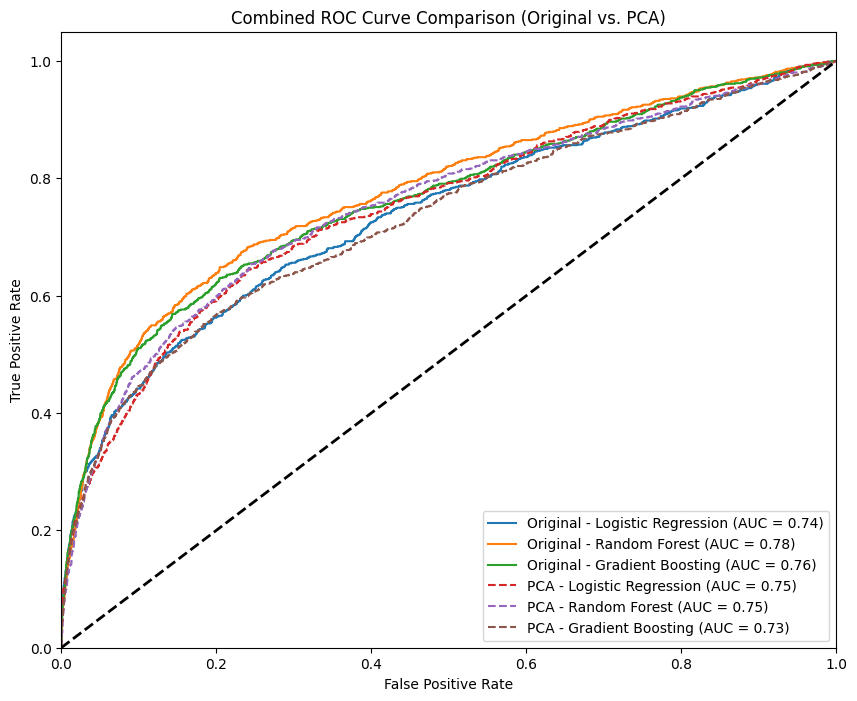

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def get_roc_data(model, X_test, y_test):
    """Return FPR, TPR and AUC for a given model."""
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_val = auc(fpr, tpr)
    return fpr, tpr, auc_val

# Collect ROC data from best models for original and PCA pipelines
roc_data = {}

models_orig = {
    'Logistic Regression': best_model_lr_orig,
    'Random Forest': best_model_rf_orig,
    'Gradient Boosting': best_model_gb_orig
    #'SVM': best_model_svm_orig
}

models_pca = {
    'Logistic Regression': best_model_lr_pca,
    'Random Forest': best_model_rf_pca,
    'Gradient Boosting': best_model_gb_pca
    #'SVM': best_model_svm_pca
}

for name, model in models_orig.items():
    roc_data[f'Original - {name}'] = get_roc_data(model, X_test, y_test)

for name, model in models_pca.items():
    roc_data[f'PCA - {name}'] = get_roc_data(model, X_test, y_test)

# Plot all ROC curves in one graph
plt.figure(figsize=(10, 8))
for label, (fpr, tpr, auc_val) in roc_data.items():
    linestyle = '-' if label.startswith('Original') else '--'
    plt.plot(fpr, tpr, linestyle=linestyle, label=f'{label} (AUC = {auc_val:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve Comparison (Original vs. PCA)')
plt.legend(loc='lower right')
plt.show()


# Reference

[1] UCI Machine Learning Repository, "Bank Marketing," [Online]. Available: https://archive.ics.uci.edu/dataset/222/bank+marketing. [Accessed: Jan. 28, 2025].​

[2] McKinsey & Company. (2021). "Consumer Behavior During the Holiday Season and Its Impact on Financial Services." [Online]. Available: https://www.mckinsey.com/industries/financial-services/our-insights. [Accessed: Feb. 9, 2025].​

[3] Budget Cycles and Financial Institution Planning: American Bankers Association. (2023). "How Banks Plan Their Marketing Strategies and Budget Cycles." [Online]. Available: https://www.aba.com. [Accessed: Feb. 9, 2025].​

[4] Internal Strategy and Planning: Harvard Business Review. (2019). "How Companies Use Annual Strategic Planning for Marketing Success." [Online]. Available: https://hbr.org. [Accessed: Feb. 9, 2025].​

[5] S. Moro, P. Cortez, and P. Rita, "A Data-Driven Approach to Predict the Success of Bank Telemarketing," Decision Support Systems, vol. 62, pp. 22-31, 2014, doi: 10.1016/j.dss.2014.03.001.​

​